In [1]:
from google.colab import files       #uploading the original dataset
upload=files.upload()

Saving NoSunglasses0.pgm to NoSunglasses0.pgm
Saving NoSunglasses1.pgm to NoSunglasses1.pgm
Saving NoSunglasses2.pgm to NoSunglasses2.pgm
Saving NoSunglasses3.pgm to NoSunglasses3.pgm
Saving NoSunglasses4.pgm to NoSunglasses4.pgm
Saving NoSunglasses5.pgm to NoSunglasses5.pgm
Saving NoSunglasses6.pgm to NoSunglasses6.pgm
Saving NoSunglasses7.pgm to NoSunglasses7.pgm
Saving NoSunglasses8.pgm to NoSunglasses8.pgm
Saving NoSunglasses9.pgm to NoSunglasses9.pgm
Saving NoSunglasses10.pgm to NoSunglasses10.pgm
Saving NoSunglasses11.pgm to NoSunglasses11.pgm
Saving NoSunglasses12.pgm to NoSunglasses12.pgm
Saving NoSunglasses13.pgm to NoSunglasses13.pgm
Saving NoSunglasses14.pgm to NoSunglasses14.pgm
Saving NoSunglasses15.pgm to NoSunglasses15.pgm
Saving NoSunglasses16.pgm to NoSunglasses16.pgm
Saving NoSunglasses17.pgm to NoSunglasses17.pgm
Saving NoSunglasses18.pgm to NoSunglasses18.pgm
Saving NoSunglasses19.pgm to NoSunglasses19.pgm
Saving NoSunglasses20.pgm to NoSunglasses20.pgm
Saving NoSun

In [2]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
x_data=[]                                                    #list to store images as numpy array
for i in range(313):
  temp_im=cv2.imread('NoSunglasses'+str(i)+'.pgm')              #reading images  with opencv and converting them to numpy array
  temp=np.array(temp_im,dtype='float')
  x_data.append(temp)

In [4]:
for i in range(311):
  temp_im=cv2.imread('YesSunglasses'+str(i)+'.pgm')
  temp=np.array(temp_im,dtype='float')
  x_data.append(temp)

In [5]:
y_data=[]                      #list to store image labels
for i in range(313):
  y_data.append(0)

In [6]:
for i in range(311):
  y_data.append(1)

In [7]:
images=np.array(x_data,dtype='float')
label=np.array(y_data)

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((images, label))     #creating the full dataset

In [9]:
DATASET_SIZE=624
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.1 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)

full_dataset = dataset                                        #spliting into train,validation and test sets
full_dataset = full_dataset.shuffle(624)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)


In [10]:
data_gen_train = ImageDataGenerator(
    rescale=1./255,                                                      #image data generator for train dataset with augmentaion
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )

In [11]:
t_x=[]
t_y=[]
for temp_x,temp_y in train_dataset:                 #t_x stores xlabel of train_dataset
                                                    #t_y stores y label of train dataset
  t_x.append(np.array(temp_x))
  t_y.append(np.array(temp_y))

In [12]:
train_x=np.array(t_x,dtype='float')
train_y=np.array(t_y)

In [14]:
train_data=data_gen_train.fit(np.array(t_x))
train_data_gen=data_gen_train.flow(train_x,train_y,batch_size=32)

In [15]:
image_gen_val = ImageDataGenerator(rescale=1./255)          #image data generator for validation dataset with normalization

In [16]:
v_x=[]
v_y=[]
for temp_x,temp_y in val_dataset:                                #v_x stores xlabel of validation dataset
                                                                 #v_y stores y label of validation dataset
  v_x.append(np.array(temp_x))
  v_y.append(np.array(temp_y))

In [17]:
val_x=np.array(v_x,dtype='float')
val_y=np.array(v_y)

In [18]:
val_data=image_gen_val.fit(np.array(v_x))
val_data_gen=image_gen_val.flow(val_x,val_y,batch_size=32)

In [67]:

model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(120,128,3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_cnn.add(Dropout(0.4))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(1))

In [52]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 120
IMG_WIDTH = 128
total_train=train_x.shape[0]
total_val=val_x.shape[0]

In [53]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision



In [68]:

model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['acc',precision_m, recall_m])

In [69]:
history = model_cnn.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 2s 156ms/step - loss: 0.8215 - acc: 0.5032 - precision_m: 0.0375 - recall_m: 0.0667 - val_loss: 0.6951 - val_acc: 0.5938 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/15
15/15 [==============================] - 2s 149ms/step - loss: 0.6938 - acc: 0.4882 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6928 - val_acc: 0.5000 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/15
15/15 [==============================] - 2s 147ms/step - loss: 0.6929 - acc: 0.4904 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6938 - val_acc: 0.5938 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/15
15/15 [==============================] - 2s 143ms/step - loss: 0.6925 - acc: 0.4797 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6880 - val_acc: 0.4375 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 5/15
15/15 [==============================] - 2s 1

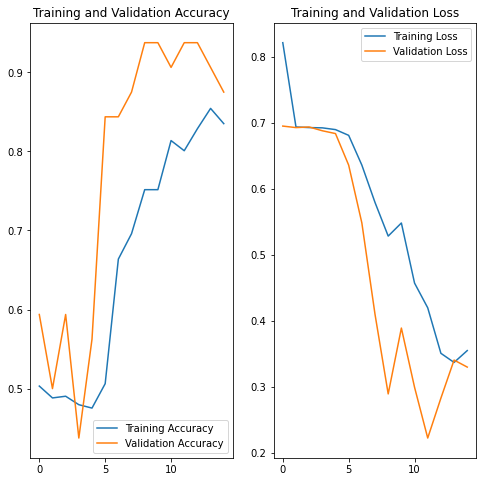

In [70]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
image_gen_test = ImageDataGenerator(rescale=1./255)            #image data generator for test dataset with normalization
te_x=[]
te_y=[]
for temp_x,temp_y in test_dataset:
  te_x.append(np.array(temp_x))
  te_y.append(np.array(temp_y))                                 #v_x stores xlabel of test dataset
                                                                #v_y stores y label of test dataset
test_x=np.array(v_x,dtype='float')
test_y=np.array(v_y)
test_data=image_gen_test.fit(np.array(v_x))
test_data_gen=image_gen_test.flow(test_x,test_y,batch_size=32)

In [58]:
total_test=test_x.shape[0]

In [71]:
test_loss, test_accuracy,_ ,precision, recall = model_cnn.evaluate(test_data_gen, steps=total_test//32)
print('Accuracy on test dataset:', test_accuracy)


1/1 [==============================] - 0s 2ms/step - loss: 0.2648 - acc: 0.9062 - f1_m: 0.8889 - precision_m: 1.0000 - recall_m: 0.8000
Accuracy on test dataset: 0.90625
